In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import hdbscan

plt.close('all')

In [2]:
def conv(x, kernel, pad):
    H = x.shape[0]
    W = x.shape[1]

    Kh = kernel.shape[0]
    Kw = kernel.shape[1]

    H1 = 1+(H+2*pad-Kh)
    W1 = 1+(W+2*pad-Kw)

    res = np.zeros(shape = (H1,W1))

    ph = np.zeros(shape=(H,pad))
    pw = np.zeros(shape = (pad,W+2*pad))

    x=np.hstack((ph,x,ph))
    x=np.vstack((pw,x,pw))

    for i in range(H1):
      for j in range(W1):
        sum = 0
        for k in range(Kh):
          for f in range(Kw):
            sum+=x[i+k][j+f]*kernel[k][f]
        res[i][j]=sum
    return res


In [3]:
def process_image(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filter to reduce noise while preserving edges
    median_filtered_image = cv2.medianBlur(image, 5)

    # Normalize the image to enhance contrast
    norm_image = cv2.normalize(median_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

    return image, norm_image


In [4]:
image_path = 'img/test.png'

image, processed_image = process_image(image_path)

In [5]:
kernelx = np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
kernely = np.array([[-1, 0, 1],[-2,0,2],[-1,0,1]])

imx = conv(processed_image,kernelx,pad=3)
imy = conv(processed_image,kernely,pad=3)

image_sobel = np.sqrt(imx*imx+imy*imy)

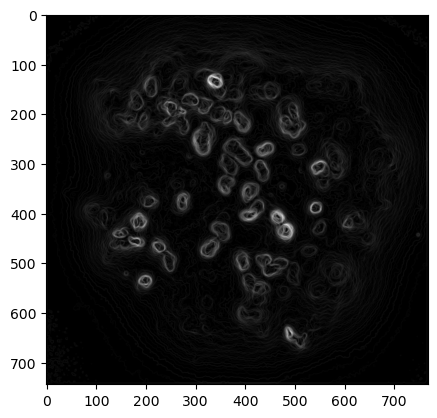

In [9]:
plt.imshow(image_sobel, cmap = 'gray')

In [6]:
max_value = image_sobel.max()

map_L = []
for i in range(image_sobel.shape[0]):
  for j in range(image_sobel.shape[1]):
    if(image_sobel[i][j]>= 0.5*max_value):
      map_L.append((j,i))
map_max = np.asarray(map_L)

In [21]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20,
                            min_samples=5,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=30)

In [22]:
clusterer.fit(map_max)

HDBSCAN(allow_single_cluster=True, leaf_size=30, min_cluster_size=20,
        min_samples=5)

In [27]:
labels = clusterer.labels_
silhouette_avg = silhouette_score(map_max, labels)
print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))

Silhouette Coefficient: 0.70


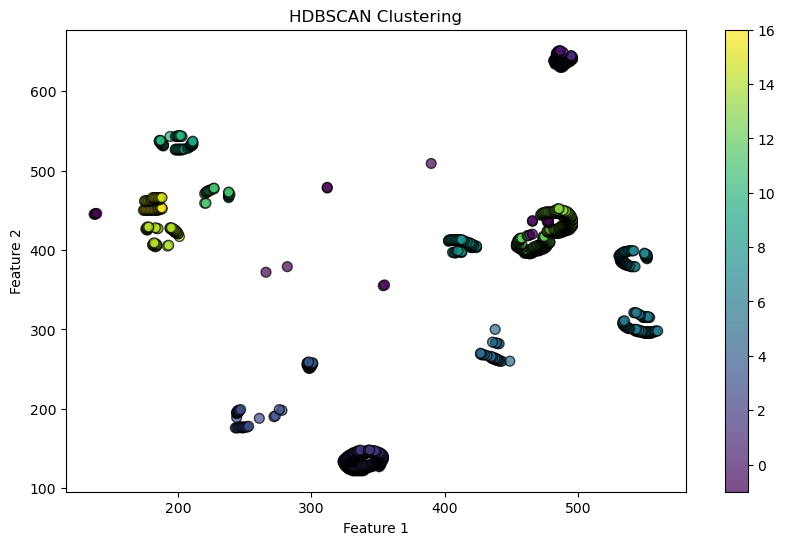

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(map_max[:, 0], map_max[:, 1], c=clusterer.labels_,
            cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [37]:
print(len(set(labels)) - (1 if -1 in labels else 0))


17
